In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Create the dataset
data = pd.read_csv('House_price.csv.csv')

In [ ]:
# Define features (X) and target (y)
X = data.drop(["price"], axis = 1)
y = data["price"]

In [ ]:
#Data Preprocessing
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
# Create a pipeline for linear regression with polynomial features and scaling
pipeline1 = make_pipeline(
    scaler,
    poly,
    LinearRegression()
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model using cross-validation
cross_val_scores = cross_val_score(pipeline1, X_train, y_train, cv=5, scoring='r2')

Cross-validated R^2 Score: 0.998118637133963


In [ ]:
# Fit the pipeline to the training data
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [ ]:
# Make predictions
y_pred = pipeline1.predict(X_test)
# Create a DataFrame to display actual and predicted prices
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Print the DataFrame
print("Actual vs. Predicted Prices:")
print(results)

Actual vs. Predicted Prices:
    Actual Price  Predicted Price
13        370000    370390.539292
45        400000    400588.889376
47        490000    484671.601055
44        360000    361692.297398
17        510000    512666.512186
27        520000    521994.520405
26        480000    475336.335186
25        430000    428632.789650
31        240000    242386.000771
19        600000    601353.436313


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Cross-validated R^2 Score: {cross_val_scores.mean()}")

Mean Squared Error: 7398723.948826447
R^2 Score: 0.9992129017075717
Cross-validated R^2 Score: 0.998118637133963


In [ ]:
# Print model coefficients (for Linear Regression inside the pipeline)
print("Model Coefficients: ", pipeline1.named_steps['linearregression'].coef_)
print("Model Intercept: ", pipeline1.named_steps['linearregression'].intercept_)

Model Coefficients:  [ 1.24377959e+05 -8.58522739e+02  2.94119025e+03 -1.64225225e+02
  9.12136354e+03 -2.24836793e+02 -5.18873317e+03 -1.37907732e+03
  1.04185770e+02]
Model Intercept:  437849.47705768683


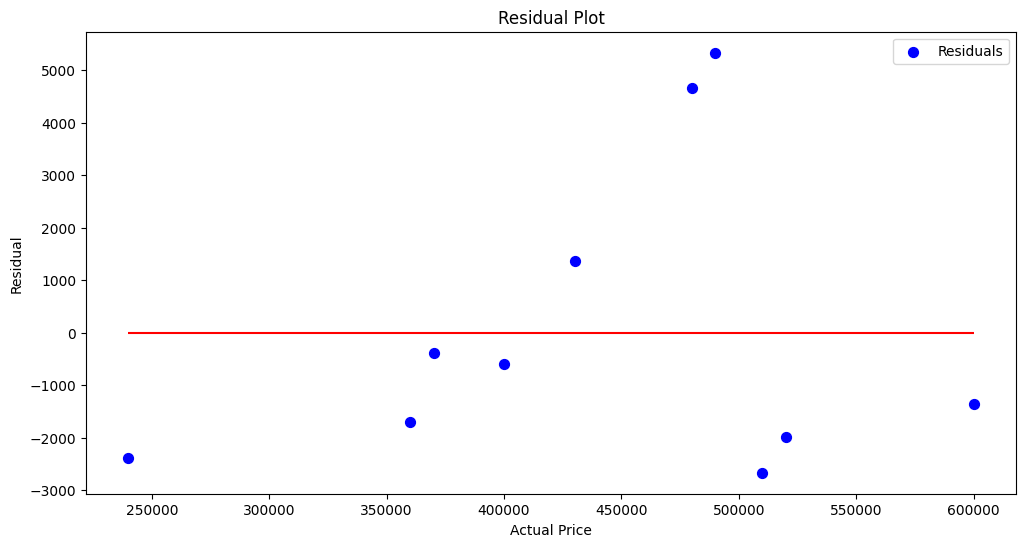

In [ ]:
# Plot Residuals
plt.figure(figsize=(12, 6))
residual = y_test - y_pred
plt.scatter(y_test, residual, color='blue', s=50, label='Residuals')  # Residual = Actual Value - Predicted Value
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.legend()
plt.show()

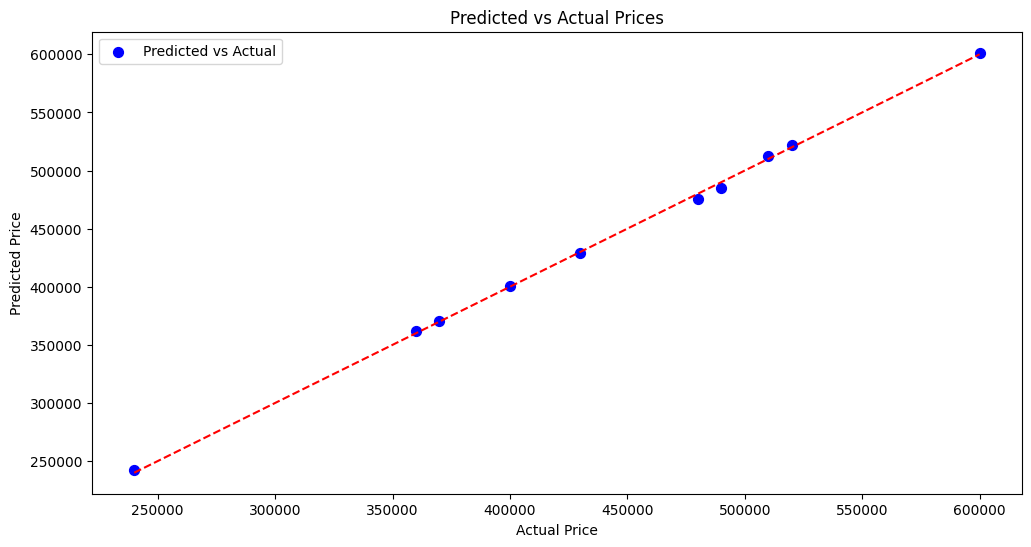

In [ ]:
# Plot Predicted vs. Actual Prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', s=50, label='Predicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.legend()
plt.show()